In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jdcal import gcal2jd
import copy
import boto3
from io import StringIO

In [2]:
session = boto3.Session(profile_name='ai-dataset-bucket-readwrite-795524854110')

# Connect to S3
s3 = session.client('s3')

bucket_name = 'artificial-intelligence-datasets'
object_key = 'input/NIFTY50 Dataset/NIFTY50_all.csv'  # e.g., 'project1/data/sample.csv'

# Download object into memory
response = s3.get_object(Bucket=bucket_name, Key=object_key)

with response['Body'] as stream:
    body = stream.read().decode('utf-8')

df = pd.read_csv(StringIO(body))

df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [3]:
df.columns = ['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'DeliverableVolume',
       'PercentageDeliverable']
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'DeliverableVolume',
       'PercentageDeliverable'],
      dtype='object')

In [4]:
df.shape

(235192, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   235192 non-null  object 
 1   Symbol                 235192 non-null  object 
 2   Series                 235192 non-null  object 
 3   Prev Close             235192 non-null  float64
 4   Open                   235192 non-null  float64
 5   High                   235192 non-null  float64
 6   Low                    235192 non-null  float64
 7   Last                   235192 non-null  float64
 8   Close                  235192 non-null  float64
 9   VWAP                   235192 non-null  float64
 10  Volume                 235192 non-null  int64  
 11  Turnover               235192 non-null  float64
 12  Trades                 120344 non-null  float64
 13  DeliverableVolume      219115 non-null  float64
 14  PercentageDeliverable  219115 non-nu

In [6]:
df = df.drop(columns=['Series'], axis=1)
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,DeliverableVolume,PercentageDeliverable
0,2007-11-27,MUNDRAPORT,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [7]:
df.describe(include="all")

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,DeliverableVolume,PercentageDeliverable
count,235192,235192,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
unique,5306,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-08-13,IOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,49,5306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,NaN,NaN,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,NaN,NaN,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,NaN,NaN,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,NaN,NaN,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,NaN,NaN,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400


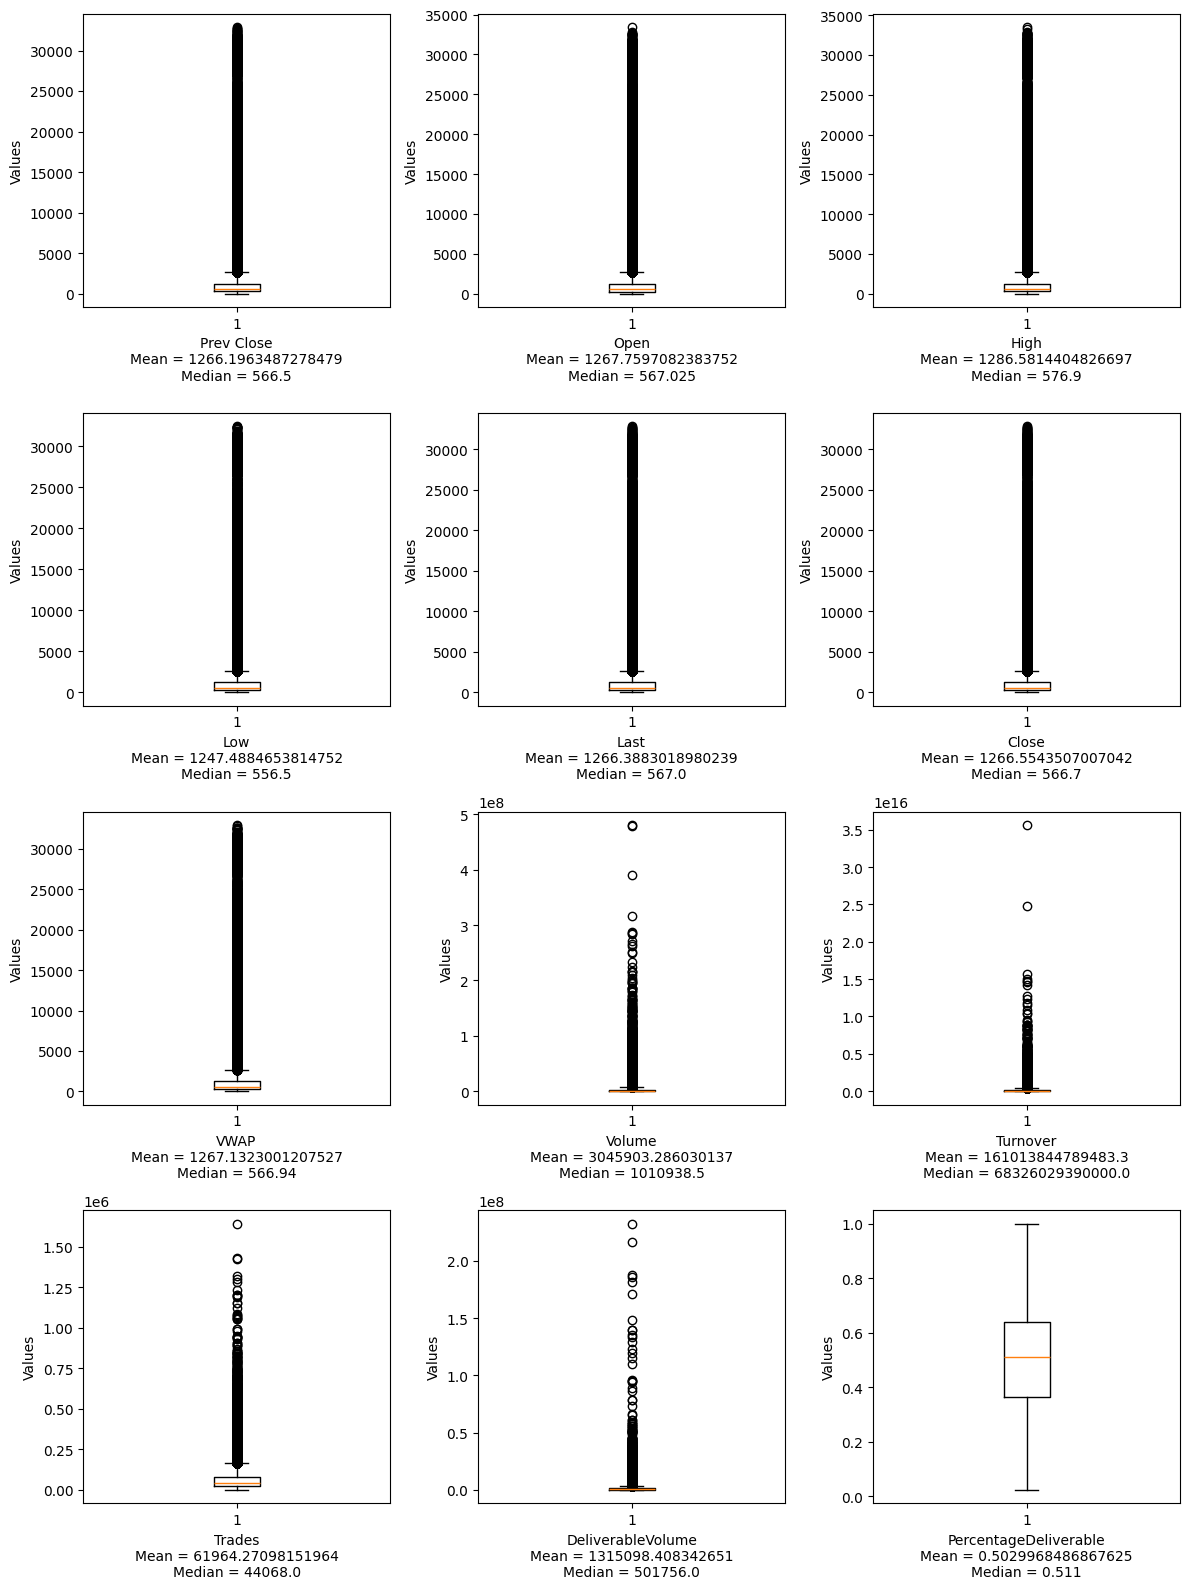

In [8]:
numeric_features = list(df.columns[(df.dtypes != 'object')])
fig, axes = plt.subplots(len(numeric_features)//3, 3, figsize=(12, 16))

for index, feature in enumerate(numeric_features):
    axes[index//3, index%3].boxplot(df[feature][df[feature].notnull()])
    axes[index//3, index%3].set_xlabel(feature + "\nMean = " + str(df[feature].mean()) + "\nMedian = " + str(df[feature].median()))
    axes[index//3, index%3].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [9]:
df['Trades'] = df['Trades'].fillna(round(df['Trades'].median(), 2))
df['DeliverableVolume'] = df['DeliverableVolume'].fillna(round(df['DeliverableVolume'].median(), 2))
df['PercentageDeliverable'] = df['PercentageDeliverable'].fillna(round(df['PercentageDeliverable'].median(), 2))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   235192 non-null  object 
 1   Symbol                 235192 non-null  object 
 2   Prev Close             235192 non-null  float64
 3   Open                   235192 non-null  float64
 4   High                   235192 non-null  float64
 5   Low                    235192 non-null  float64
 6   Last                   235192 non-null  float64
 7   Close                  235192 non-null  float64
 8   VWAP                   235192 non-null  float64
 9   Volume                 235192 non-null  int64  
 10  Turnover               235192 non-null  float64
 11  Trades                 235192 non-null  float64
 12  DeliverableVolume      235192 non-null  float64
 13  PercentageDeliverable  235192 non-null  float64
dtypes: float64(11), int64(1), object(2)


In [10]:
for col in df.columns:
    print(f"col -> {col}")
    col_dtype = df[col].dtypes
    print(f"Datatype of the column -> {col_dtype}")
    nbr_of_uniq = df[col].nunique()
    print(f"Number of unique values -> {nbr_of_uniq}\n")       

col -> Date
Datatype of the column -> object
Number of unique values -> 5306

col -> Symbol
Datatype of the column -> object
Number of unique values -> 65

col -> Prev Close
Datatype of the column -> float64
Number of unique values -> 63729

col -> Open
Datatype of the column -> float64
Number of unique values -> 44298

col -> High
Datatype of the column -> float64
Number of unique values -> 49036

col -> Low
Datatype of the column -> float64
Number of unique values -> 51335

col -> Last
Datatype of the column -> float64
Number of unique values -> 48570

col -> Close
Datatype of the column -> float64
Number of unique values -> 63739

col -> VWAP
Datatype of the column -> float64
Number of unique values -> 138831

col -> Volume
Datatype of the column -> int64
Number of unique values -> 220434

col -> Turnover
Datatype of the column -> float64
Number of unique values -> 235184

col -> Trades
Datatype of the column -> float64
Number of unique values -> 79112

col -> DeliverableVolume
Data

In [11]:
df["Symbol"] = df['Symbol'].map({symbol:index+1 for index, symbol in enumerate(df['Symbol'].unique())})
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,DeliverableVolume,PercentageDeliverable
0,2007-11-27,1,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,44068.0,9859619.0,0.3612
1,2007-11-28,1,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,44068.0,1453278.0,0.3172
2,2007-11-29,1,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,44068.0,1069678.0,0.2088
3,2007-11-30,1,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,44068.0,1260913.0,0.2735
4,2007-12-03,1,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,44068.0,816123.0,0.2741


In [12]:
def to_julian_date(date):
    return sum(gcal2jd(date.year, date.month, date.day))

df['Date'] = pd.to_datetime(df['Date']).apply(to_julian_date)
df.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,DeliverableVolume,PercentageDeliverable
0,2454431.5,1,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,44068.0,9859619.0,0.3612
1,2454432.5,1,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,44068.0,1453278.0,0.3172
2,2454433.5,1,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,44068.0,1069678.0,0.2088
3,2454434.5,1,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,44068.0,1260913.0,0.2735
4,2454437.5,1,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,44068.0,816123.0,0.2741


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   235192 non-null  float64
 1   Symbol                 235192 non-null  int64  
 2   Prev Close             235192 non-null  float64
 3   Open                   235192 non-null  float64
 4   High                   235192 non-null  float64
 5   Low                    235192 non-null  float64
 6   Last                   235192 non-null  float64
 7   Close                  235192 non-null  float64
 8   VWAP                   235192 non-null  float64
 9   Volume                 235192 non-null  int64  
 10  Turnover               235192 non-null  float64
 11  Trades                 235192 non-null  float64
 12  DeliverableVolume      235192 non-null  float64
 13  PercentageDeliverable  235192 non-null  float64
dtypes: float64(12), int64(2)
memory usag

In [14]:
df.columns

Index(['Date', 'Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close',
       'VWAP', 'Volume', 'Turnover', 'Trades', 'DeliverableVolume',
       'PercentageDeliverable'],
      dtype='object')

In [15]:
x = df[['Date', 'Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'VWAP', 'Volume', 'Turnover', 'Trades', 'DeliverableVolume',
       'PercentageDeliverable']]
y = df['Close']

In [16]:
x.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,DeliverableVolume,PercentageDeliverable
0,2454431.5,1,440.00,770.00,1050.00,770.0,959.0,984.72,27294366,2.687719e+15,44068.0,9859619.0,0.3612
1,2454432.5,1,962.90,984.00,990.00,874.0,885.0,941.38,4581338,4.312765e+14,44068.0,1453278.0,0.3172
2,2454433.5,1,893.90,909.00,914.75,841.0,887.0,888.09,5124121,4.550658e+14,44068.0,1069678.0,0.2088
3,2454434.5,1,884.20,890.00,958.00,890.0,929.0,929.17,4609762,4.283257e+14,44068.0,1260913.0,0.2735
4,2454437.5,1,921.55,939.75,995.00,922.0,980.0,965.65,2977470,2.875200e+14,44068.0,816123.0,0.2741


In [17]:
y.head()

0    962.90
1    893.90
2    884.20
3    921.55
4    969.30
Name: Close, dtype: float64

In [18]:
def zscore_normalization(x):
    
    mu = x.mean()
    sigma = x.std()
        
    x_norm = (x - mu) / sigma
    
    return x_norm

In [19]:
x = zscore_normalization(x)
x.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,DeliverableVolume,PercentageDeliverable
0,-0.586648,-1.779314,-0.320061,-0.192538,-0.090310,-0.187499,-0.119078,-0.109348,3.306317,7.661127,-0.183419,3.137732,-0.775689
1,-0.586187,-1.779314,-0.117494,-0.109761,-0.113214,-0.146660,-0.147745,-0.126129,0.209359,0.819453,-0.183419,0.070699,-1.015578
2,-0.585726,-1.779314,-0.144224,-0.138771,-0.141939,-0.159619,-0.146970,-0.146762,0.283368,0.891584,-0.183419,-0.069256,-1.606576
3,-0.585265,-1.779314,-0.147982,-0.146121,-0.125430,-0.140378,-0.130700,-0.130856,0.213235,0.810506,-0.183419,0.000515,-1.253831
4,-0.583882,-1.779314,-0.133513,-0.126877,-0.111306,-0.127812,-0.110943,-0.116731,-0.009331,0.383574,-0.183419,-0.161765,-1.250560


In [20]:
x.describe(include = "all")

,Date,Symbol,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,DeliverableVolume,PercentageDeliverable
count,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05,2.351920e+05
mean,8.099496e-15,-1.546812e-17,1.933515e-18,8.700819e-17,-1.024763e-16,1.411466e-16,-4.060382e-17,-1.314790e-16,4.833788e-18,2.030191e-17,-7.830737e-17,-1.546812e-17,7.521375e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.916635e+00,-1.779314e+00,-4.905133e-01,-4.870922e-01,-4.874055e-01,-4.865224e-01,-4.870582e-01,-4.870571e-01,-4.153134e-01,-4.882040e-01,-1.065881e+00,-4.595240e-01,-2.616290e+00
25%,-8.226807e-01,-8.797273e-01,-3.842519e-01,-3.840077e-01,-3.844337e-01,-3.839944e-01,-3.842842e-01,-3.842625e-01,-3.854515e-01,-4.393024e-01,-2.070349e-01,-4.072042e-01,-6.879114e-01
50%,4.077354e-02,1.985962e-02,-2.710562e-01,-2.710500e-01,-2.709070e-01,-2.713354e-01,-2.709345e-01,-2.711086e-01,-2.774707e-01,-2.810352e-01,-1.834195e-01,-2.764614e-01,3.557135e-02
75%,8.572057e-01,8.069982e-01,-9.295973e-03,-9.456384e-03,-9.001755e-03,-1.014617e-02,-9.099082e-03,-9.474504e-03,-3.552271e-03,7.692224e-02,-1.591181e-01,2.823990e-02,6.810903e-01
max,1.673638e+00,1.819034e+00,1.223992e+01,1.242900e+01,1.228921e+01,1.225962e+01,1.223472e+01,1.227712e+01,6.517784e+01,1.075846e+02,3.184350e+01,8.437876e+01,2.707060e+00


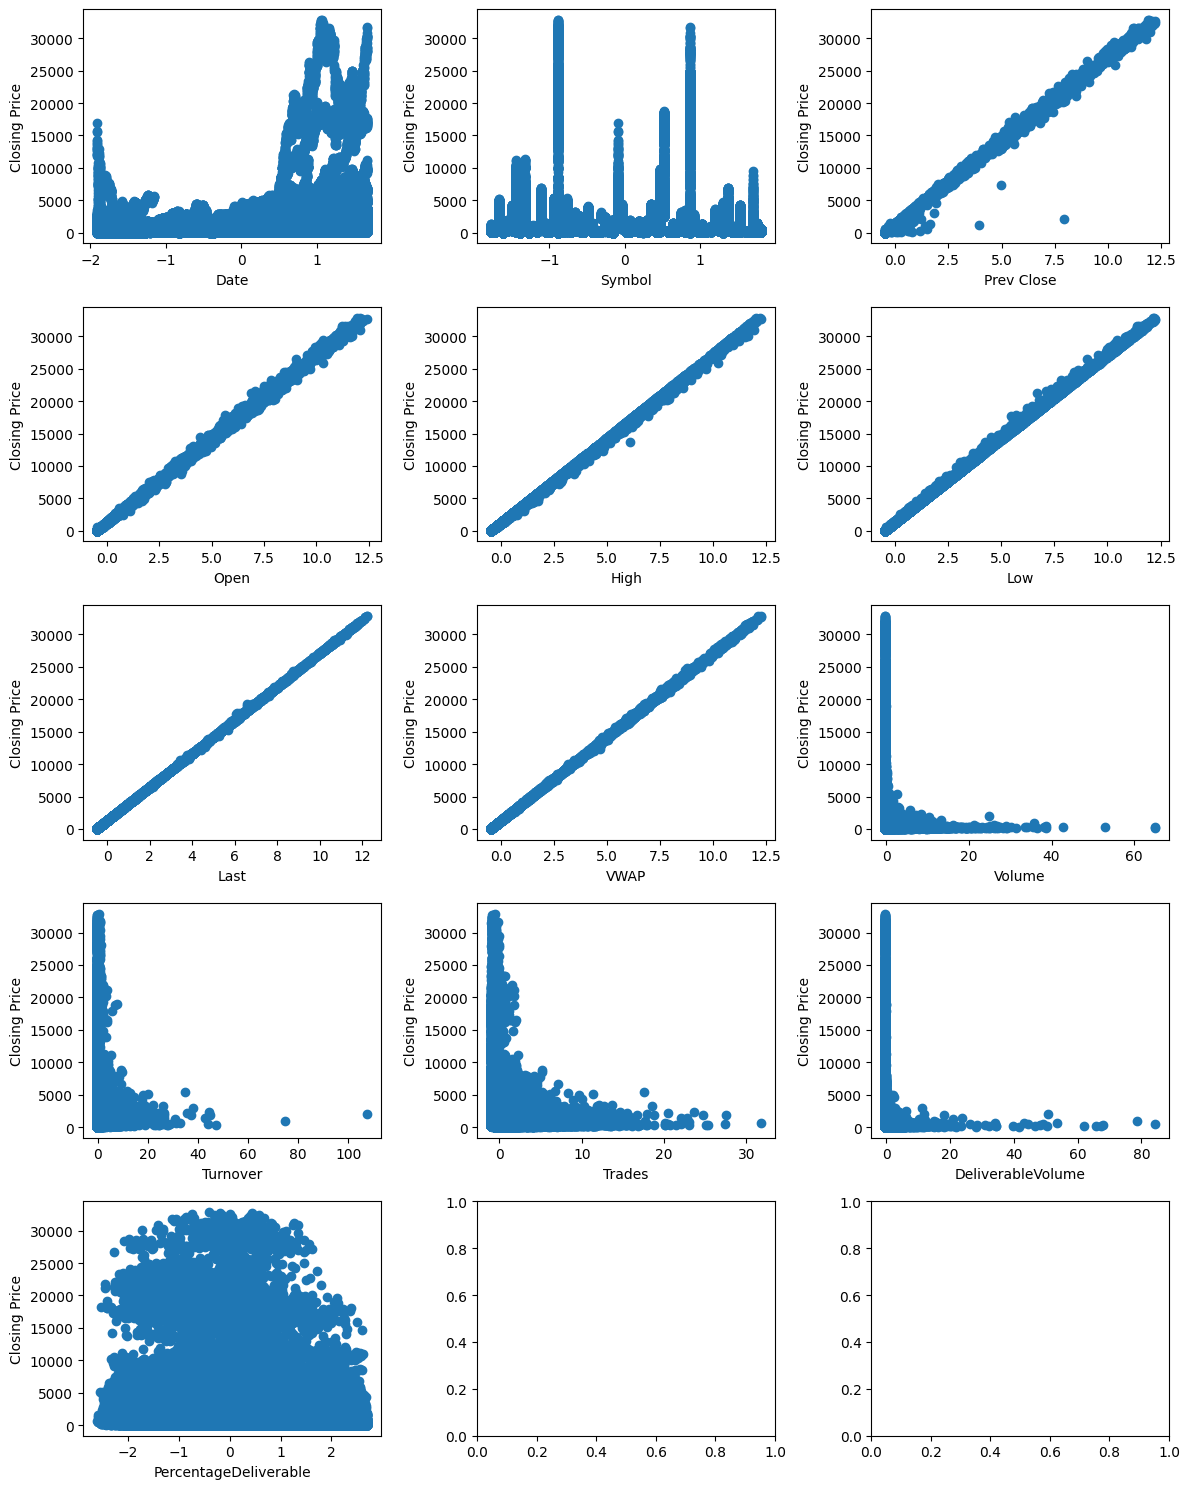

In [21]:
#x['Volume'] = x['Volume'] ** 4
#x['Turnover'] = x['Turnover'] ** 3
#x['Trades'] = x['Trades'] ** 2
#x['DeliverableVolume'] = x['DeliverableVolume'] ** 4

features = list(x.columns)

if len(features)%3 == 0:
    row_count = len(features)//3
else:
    row_count = len(features)//3 + 1
    
fig, axes = plt.subplots(row_count, 3, figsize=(12, row_count*3))

for index, feature in enumerate(features):
    axes[index//3, index%3].scatter(x[feature], y)
    axes[index//3, index%3].set_xlabel(feature)
    axes[index//3, index%3].set_ylabel('Closing Price')

plt.tight_layout()
plt.show()

<Axes: xlabel='Volume'>

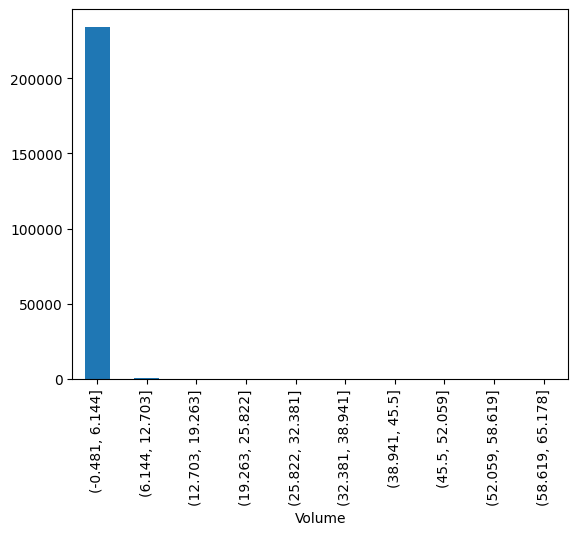

In [22]:
(pd.cut(x['Volume'], bins=10)
 .value_counts()
 .sort_index()
 .plot.bar()
)

<Axes: xlabel='Volume'>

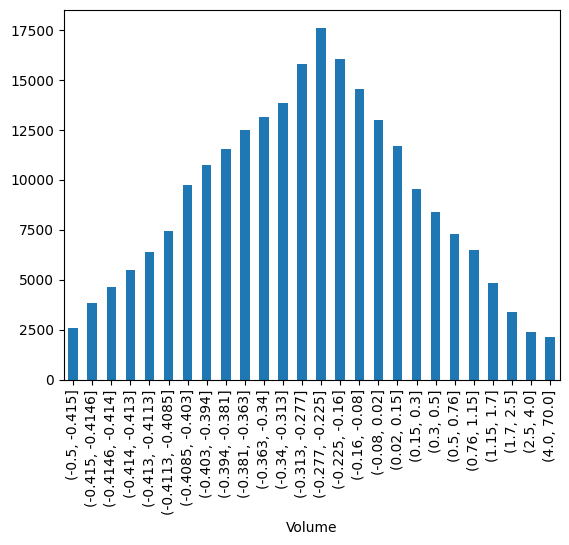

In [23]:
(pd.cut(x['Volume'], bins=[-0.5,-0.415,-0.4146,-0.414,-0.413,-0.4113,-0.4085,-0.403,-0.394,-0.381,-0.363,-0.34,-0.313,-0.277,-0.225,-0.16,-0.08,0.02,0.15,0.3,0.5,0.76,1.15,1.7,2.5,4,70])
 .value_counts()
 .sort_index()
 .plot.bar()
)

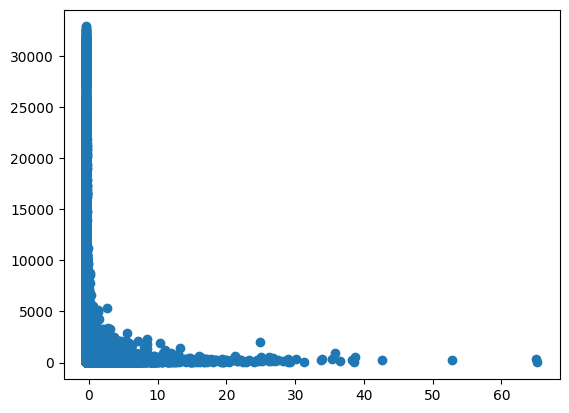

In [24]:
#temp_x = pd.cut(x['Volume'], bins=[-0.5,-0.415,-0.4146,-0.414,-0.413,-0.4113,-0.4085,-0.403,-0.394,-0.381,-0.363,-0.34,-0.313,-0.277,-0.225,-0.16,-0.08,0.02,0.15,0.3,0.5,0.76,1.15,1.7,2.5,4,70]).apply(lambda x : x.right)
#plt.scatter(temp_x, y)

temp_x = (x['Volume'])
plt.scatter(temp_x,y)

In [25]:
x['Volume'] = pd.cut(x['Volume'], bins=[-0.5,-0.415,-0.4146,-0.414,-0.413,-0.4113,-0.4085,-0.403,-0.394,-0.381,-0.363,-0.34,-0.313,-0.277,-0.225,-0.16,-0.08,0.02,0.15,0.3,0.5,0.76,1.15,1.7,2.5,4,70]).apply(lambda x : x.right)
#x['Turnover'] = pd.cut(x['Turnover'], bins=[0,0.02,0.05,0.1,0.18,0.3,0.5,0.76,1.15,1.7,2.5,4,70]).apply(lambda x : x.left)
#x['Trades'] = pd.cut(x['Trades'], bins=[0,0.02,0.05,0.1,0.18,0.3,0.5,0.76,1.15,1.7,2.5,4,]).apply(lambda x : x.left)
#x['DeliverableVolume'] = pd.cut(x['DeliverableVolume'], bins=[0,0.02,0.05,0.1,0.18,0.3,0.5,0.76,1.15,1.7,2.5,4,70]).apply(lambda x : x.left)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Date                   235192 non-null  float64 
 1   Symbol                 235192 non-null  float64 
 2   Prev Close             235192 non-null  float64 
 3   Open                   235192 non-null  float64 
 4   High                   235192 non-null  float64 
 5   Low                    235192 non-null  float64 
 6   Last                   235192 non-null  float64 
 7   VWAP                   235192 non-null  float64 
 8   Volume                 235192 non-null  category
 9   Turnover               235192 non-null  float64 
 10  Trades                 235192 non-null  float64 
 11  DeliverableVolume      235192 non-null  float64 
 12  PercentageDeliverable  235192 non-null  float64 
dtypes: category(1), float64(12)
memory usage: 21.8 MB


In [26]:
a = [1,2,3]
a.extend([4,5])
a

[1, 2, 3, 4, 5]

In [27]:
#x = x.drop(columns=['Symbol', 'PercentageDeliverable', 'Turnover', 'Trades', 'DeliverableVolume'], axis=1)
x = x[['Date', 'Prev Close', 'Open', 'Volume']]
x.head()

,Date,Prev Close,Open,Volume
0,-0.586648,-0.320061,-0.192538,4.00
1,-0.586187,-0.117494,-0.109761,0.30
2,-0.585726,-0.144224,-0.138771,0.30
3,-0.585265,-0.147982,-0.146121,0.30
4,-0.583882,-0.133513,-0.126877,0.02


In [28]:
initial_w = np.zeros(x.shape[1])
initial_b = 0.

In [29]:
train_size = 0.01

train_rows = int(round(x.shape[0] * train_size, 0))

x_train = x[0:train_rows]
x_test = x[train_rows:]
y_train = y[0:train_rows]
y_test = y[train_rows:]

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2352, 4)
(232840, 4)
(2352,)
(232840,)


In [31]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb_i = np.dot(x.iloc[i].values, w) + b
        cost = cost + (f_wb_i - y[i])**2

    total_cost = cost / (2 * m)

    return total_cost

In [32]:
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Initial w : {initial_w}')
print(f'Initial b : {initial_b}')
print(f'Cost : {cost}')

Initial w : [0. 0. 0. 0.]
Initial b : 0.0
Cost : 76088.09384194307


In [33]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = x.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n, ))
    dj_db = 0

    for i in range(m):
        x_i = x.iloc[i].values
        f_wb_i = (np.dot(x_i, w) + b) - y[i]
        dj_dw = f_wb_i * x_i
        dj_db += f_wb_i

    return dj_dw, dj_db

In [34]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'Initial w : {initial_w}')
print(f'Initial b : {initial_b}')
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

Initial w : [0. 0. 0. 0.]
Initial b : 0.0
dj_db at initial w,b: [-345.09649139  123.72622199  123.66691358  -51.0525    ]
dj_dw at initial w,b: 
 -760024.750000002


In [35]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """

    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = copy.deepcopy(b_in)

    for i in range(num_iters + 1):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w, b))

        if i % 100 == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}    ")

    return w, b, J_history 

In [36]:
iterations = 10000
alpha = 5.0e-7

w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 75965.35    
Iteration  100: Cost 65041.98    
Iteration  200: Cost 56409.73    
Iteration  300: Cost 49588.08    
Iteration  400: Cost 44197.26    
Iteration  500: Cost 39937.17    
Iteration  600: Cost 36570.65    
Iteration  700: Cost 33910.28    
Iteration  800: Cost 31807.95    
Iteration  900: Cost 30146.62    
Iteration 1000: Cost 28833.78    
Iteration 1100: Cost 27796.34    
Iteration 1200: Cost 26976.53    
Iteration 1300: Cost 26328.71    
Iteration 1400: Cost 25816.80    
Iteration 1500: Cost 25412.29    
Iteration 1600: Cost 25092.66    
Iteration 1700: Cost 24840.10    
Iteration 1800: Cost 24640.53    
Iteration 1900: Cost 24482.86    
Iteration 2000: Cost 24358.27    
Iteration 2100: Cost 24259.85    
Iteration 2200: Cost 24182.08    
Iteration 2300: Cost 24120.66    
Iteration 2400: Cost 24072.13    
Iteration 2500: Cost 24033.80    
Iteration 2600: Cost 24003.53    
Iteration 2700: Cost 23979.63    
Iteration 2800: Cost 23960.76    
Iteration 2900

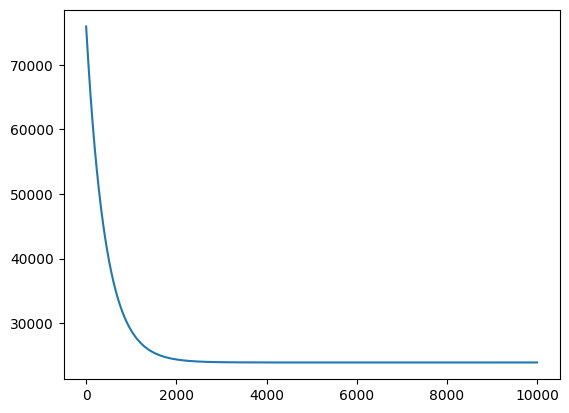

In [37]:
plt.plot(list(range(len(J_hist))), J_hist)
plt.show()

In [38]:
w_final

array([ 0.22579884, -0.08095486, -0.08091605,  0.03340398])

In [39]:
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train.iloc[i].values, w_final) + b_final:0.2f}, target value: {y_train[i]}")

prediction: 323.08, target value: 962.9
prediction: 322.93, target value: 893.9
prediction: 322.94, target value: 884.2
prediction: 322.94, target value: 921.55
prediction: 322.93, target value: 969.3
prediction: 322.93, target value: 1041.45
prediction: 322.92, target value: 1082.45
prediction: 322.91, target value: 1081.3
prediction: 322.91, target value: 1102.4
prediction: 322.91, target value: 1075.4
prediction: 322.91, target value: 1047.65
prediction: 322.91, target value: 1036.8
prediction: 322.92, target value: 1129.95
prediction: 322.91, target value: 1110.5
prediction: 322.91, target value: 1044.25
prediction: 322.91, target value: 1074.95
prediction: 322.91, target value: 1066.9
prediction: 322.91, target value: 1060.2
prediction: 322.92, target value: 1156.8
prediction: 322.91, target value: 1199.9
prediction: 322.90, target value: 1211.65
prediction: 322.90, target value: 1249.1
prediction: 322.90, target value: 1268.8
prediction: 322.90, target value: 1296.85
prediction: 